# Long Term MHW Trends (not detrended)


Paper Section 3.3

In [1]:
import os
import pickle
from pathlib import Path

import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr
import rioxarray
import scipy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
SAVE_FIGS = True
REPO_ROOT = os.getenv('REPO_ROOT', '/Users/rwegener/repos/chesapeake_mhw')
REPO_ROOT = Path(REPO_ROOT)

In [3]:
with open(REPO_ROOT / 'data/02_interim' / 'mhw_eventstats_dict.pickle', 'rb') as handle:
    event_statistics = pickle.load(handle)

## Calculating stats for each year

In [4]:
def no_annual_events(time_arr):
    '''
    counts the number of MHW in each year
    '''
    # getting the years from the start date
    f = lambda x: x.year
    years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
    # count the number of events for every year from 2003 to 2021
    # don't include 2002 or 2022 because we don't have the full time series
    year_counts = np.empty(len(range(2003, 2024)))
    for i, yr in enumerate(range(2003, 2024)):
        year_counts[i] = np.count_nonzero(years == yr)

    return year_counts

In [5]:
def total_no_mhw_days_yearly(time_arr):
    '''
    counts the number of MHW days in each year
    '''
    # getting the years from the start date
    f = lambda x: x.year
    years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
    # count the number of events for every year from 2003 to 2021
    # don't include 2002 or 2022 because we don't have the full time series
    year_counts = np.empty(len(range(2003, 2024)))
    # loop through each of the years we are analyzing
    for i, yr in enumerate(range(2003, 2024)):
        this_year_dur = []
        # go through each mhw in the list and check if the year is the current year
        for sample_year, duration  in zip(years, time_arr['duration']): 
            if sample_year == yr:
                # if the year is part of the current year, extract the value
                this_year_dur = np.append(this_year_dur, duration)
        # sum all the durations for that year and save it in year index i of year_counts
        year_counts[i] = np.sum(this_year_dur)

    return year_counts

The one below doesn't work right now because I can't figure out how to vectorize a function with multiple input arguments. Instead I've made a new function for each metric, but really most of the metrics could share a function if we could figure out how to get them to vectorize.

In [6]:
# def avg_annual_field(time_arr, field):
#     '''
#     average duration of mhw in each year
    
#     Parameters
#     ----------
#     field: string
#         The column from event_statstics that should be averaged over
#     '''
#     # getting the years from the start date
#     f = lambda x: x.year
#     years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
#     # count the number of events for every year from 2003 to 2021
#     # don't include 2002 or 2022 because we don't have the full time series
#     year_counts = np.empty(len(range(2003, 2023)))
#     # loop through each of the years we are analyzing
#     for i, yr in enumerate(range(2003, 2023)):
#         this_year = []
#         # go through each mhw in the list and check if the year is the current year
#         for sample_year, field  in zip(years, time_arr[field]): 
#             if sample_year == yr:
#                 # if the year is part of the current year, extract the value
#                 this_year = np.append(this_year, field)
#         # sum all the values for that year and save it in year index i of year_counts
#         annual_mean = np.mean(this_year)
#         if np.isnan(annual_mean):
#             annual_mean = 0
#         year_counts[i] = annual_mean
#     return year_counts

In [7]:
def avg_annual_duration(time_arr):
    '''
    average duration of mhw in each year
    
    Parameters
    ----------
    field: string
        The column from event_statstics that should be averaged over
    '''
    # getting the years from the start date
    f = lambda x: x.year
    years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
    # count the number of events for every year from 2003 to 2021
    # don't include 2002 or 2022 because we don't have the full time series
    year_counts = np.empty(len(range(2003, 2024)))
    # loop through each of the years we are analyzing
    for i, yr in enumerate(range(2003, 2024)):
        this_year = []
        # go through each mhw in the list and check if the year is the current year
        for sample_year, field  in zip(years, time_arr['duration']): 
            if sample_year == yr:
                # if the year is part of the current year, extract the value
                this_year = np.append(this_year, field)
        # sum all the values for that year and save it in year index i of year_counts
        annual_mean = np.mean(this_year)
        if np.isnan(annual_mean):
            annual_mean = 0
        year_counts[i] = annual_mean
    return year_counts

In [8]:
def avg_annual_maxintensity(time_arr):
    '''
    average duration of mhw in each year
    
    Parameters
    ----------
    field: string
        The column from event_statstics that should be averaged over
    '''
    # getting the years from the start date
    f = lambda x: x.year
    years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
    # count the number of events for every year from 2003 to 2021
    # don't include 2002 or 2022 because we don't have the full time series
    year_counts = np.empty(len(range(2003, 2024)))
    # loop through each of the years we are analyzing
    for i, yr in enumerate(range(2003, 2024)):
        this_year = []
        # go through each mhw in the list and check if the year is the current year
        for sample_year, field  in zip(years, time_arr['intensity_max']): 
            if sample_year == yr:
                # if the year is part of the current year, extract the value
                this_year = np.append(this_year, field)
        # sum all the values for that year and save it in year index i of year_counts
        annual_mean = np.mean(this_year)
        if np.isnan(annual_mean):
            annual_mean = 0
        year_counts[i] = annual_mean
    return year_counts

In [9]:
def avg_annual_cumintensity(time_arr):
    '''
    average duration of mhw in each year
    
    Parameters
    ----------
    field: string
        The column from event_statstics that should be averaged over
    '''
    # getting the years from the start date
    f = lambda x: x.year
    years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
    # count the number of events for every year from 2003 to 2021
    # don't include 2002 or 2022 because we don't have the full time series
    year_counts = np.empty(len(range(2003, 2024)))
    # loop through each of the years we are analyzing
    for i, yr in enumerate(range(2003, 2024)):
        this_year = []
        # go through each mhw in the list and check if the year is the current year
        for sample_year, field  in zip(years, time_arr['intensity_cumulative']): 
            if sample_year == yr:
                # if the year is part of the current year, extract the value
                this_year = np.append(this_year, field)
        # sum all the values for that year and save it in year index i of year_counts
        annual_mean = np.mean(this_year)
        if np.isnan(annual_mean):
            annual_mean = 0
        year_counts[i] = annual_mean
    return year_counts

In [10]:
def avg_annual_rate_onset(time_arr):
    '''
    average duration of mhw in each year
    
    Parameters
    ----------
    field: string
        The column from event_statstics that should be averaged over
    '''
    # getting the years from the start date
    f = lambda x: x.year
    years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
    # count the number of events for every year from 2003 to 2021
    # don't include 2002 or 2022 because we don't have the full time series
    year_counts = np.empty(len(range(2003, 2024)))
    # loop through each of the years we are analyzing
    for i, yr in enumerate(range(2003, 2024)):
        this_year = []
        # go through each mhw in the list and check if the year is the current year
        for sample_year, field  in zip(years, time_arr['rate_onset']): 
            if sample_year == yr:
                # if the year is part of the current year, extract the value
                this_year = np.append(this_year, field)
        # sum all the values for that year and save it in year index i of year_counts
        annual_mean = np.mean(this_year)
        if np.isnan(annual_mean):
            annual_mean = 0
        year_counts[i] = annual_mean
    return year_counts

In [11]:
def avg_annual_rate_decline(time_arr):
    '''
    average duration of mhw in each year
    
    Parameters
    ----------
    field: string
        The column from event_statstics that should be averaged over
    '''
    # getting the years from the start date
    f = lambda x: x.year
    years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
    # count the number of events for every year from 2003 to 2021
    # don't include 2002 or 2022 because we don't have the full time series
    year_counts = np.empty(len(range(2003, 2024)))
    # loop through each of the years we are analyzing
    for i, yr in enumerate(range(2003, 2024)):
        this_year = []
        # go through each mhw in the list and check if the year is the current year
        for sample_year, field  in zip(years, time_arr['rate_decline']): 
            if sample_year == yr:
                # if the year is part of the current year, extract the value
                this_year = np.append(this_year, field)
        # sum all the values for that year and save it in year index i of year_counts
        annual_mean = np.mean(this_year)
        if np.isnan(annual_mean):
            annual_mean = 0
        year_counts[i] = annual_mean
    return year_counts

In [12]:
yearly_events = np.vectorize(no_annual_events, signature='()->(n)')(event_statistics)
mhw_days = np.vectorize(total_no_mhw_days_yearly, signature='()->(n)')(event_statistics)
avg_duration = np.vectorize(avg_annual_duration, signature='()->(n)')(event_statistics)
avg_max_intensity = np.vectorize(avg_annual_maxintensity, signature='()->(n)')(event_statistics)
avg_cum_intensity = np.vectorize(avg_annual_cumintensity, signature='()->(n)')(event_statistics)
avg_rate_onset = np.vectorize(avg_annual_rate_onset, signature='()->(n)')(event_statistics)
avg_rate_decline = np.vectorize(avg_annual_rate_decline, signature='()->(n)')(event_statistics)

/Users/rwegener/miniconda3/envs/chesapeake_mhw/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rwegener/miniconda3/envs/chesapeake_mhw/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


## Trends (Multiple Hypothesis Testing)

In [18]:
def multiple_hypothesis(array):
    '''
    array is input array of shape x, y, t where x and y are spatial dimensions and t is time
    '''
    x = range(2003, 2024) # vector of length n, for me this is the time dimension
    y = np.transpose(array, (2, 0, 1)) # array of shape (n, m, l) where m and l are my spatial dimensions and which make up the multiple hypotheses. it is probably more general to make it into shape (n, m*l)

    slopes = np.zeros(y.shape[1:])
    p_values = np.zeros(y.shape[1:])

    for i in range(slopes.shape[0]):
        for j in range(slopes.shape[1]):
            slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y[:,i,j])
            slopes[i,j] = slope     # days/year
            p_values[i,j] = p_value

    sort_ids = np.argsort(p_values.ravel())
    reverse_sort_ids = np.argsort(sort_ids)
    sorted_pvalues = p_values.ravel()[sort_ids]
    
    S = len(sorted_pvalues)
    s = np.arange(1,S+1)
    gamma = 0.1
    BH_list_01 = s*0.1/S
    BH_list_02 = s*0.2/S
    BH_list_03 = s*0.3/S
    BH_list_04 = s*0.4/S
    
    trend = slopes.reshape((y.shape[1],y.shape[2]))*10. # unit/year -> unit/decade

    FDR_10_bool_sorted = sorted_pvalues<BH_list_01
    FDR_10_bool = FDR_10_bool_sorted[reverse_sort_ids]
    FDR_10_bool = FDR_10_bool.reshape(p_values.shape[0],p_values.shape[1])

    trend_masked_10 = np.ma.masked_array(trend, mask=~FDR_10_bool)
    return trend_masked_10

In [19]:
yearly_events.shape

(65, 40, 21)

In [20]:
yearly_events_trend10 = multiple_hypothesis(yearly_events)
mhw_days_trend10 = multiple_hypothesis(mhw_days)
avg_duration_trend10 = multiple_hypothesis(avg_duration)
avg_maxintensity_trend10 = multiple_hypothesis(avg_max_intensity)
avg_cumintensity_trend10 = multiple_hypothesis(avg_cum_intensity)
avg_rate_onset_trend10 = multiple_hypothesis(avg_rate_onset)
avg_rate_decline_trend10 = multiple_hypothesis(avg_rate_decline)

In [21]:
# opening an existing file for coordinates
path = (
    REPO_ROOT / 'data/03_processed/' /  
    'mhw_average_characteristics.nc'
)
avg_max_intensity = xr.open_dataset(path).avg_max_intensity

In [22]:
yearly_events_slope_da = xr.DataArray(yearly_events_trend10, coords=[avg_max_intensity.latitude.values, avg_max_intensity.longitude.values], 
             dims=['latitude', 'longitude'], name='yearly_events_slope')
mhw_days_slope_da = xr.DataArray(mhw_days_trend10, coords=[avg_max_intensity.latitude.values, avg_max_intensity.longitude.values], 
             dims=['latitude', 'longitude'], name='mhw_days_slope')
avg_duration_slope_da = xr.DataArray(avg_duration_trend10, coords=[avg_max_intensity.latitude.values, avg_max_intensity.longitude.values], 
             dims=['latitude', 'longitude'], name='avg_duration_slope')
avg_maxi_slope_da = xr.DataArray(avg_maxintensity_trend10, coords=[avg_max_intensity.latitude.values, avg_max_intensity.longitude.values], 
             dims=['latitude', 'longitude'], name='avg_maxintensity_slope')
avg_cumi_slope_da = xr.DataArray(avg_cumintensity_trend10, coords=[avg_max_intensity.latitude.values, avg_max_intensity.longitude.values], 
             dims=['latitude', 'longitude'], name='avg_cumulativeintensity_slope')
avg_rate_onset_slope_da = xr.DataArray(avg_rate_onset_trend10, coords=[avg_max_intensity.latitude.values, avg_max_intensity.longitude.values], 
             dims=['latitude', 'longitude'], name='avg_rate_onset_slope')
avg_rate_decline_slope_da = xr.DataArray(avg_rate_decline_trend10, coords=[avg_max_intensity.latitude.values, avg_max_intensity.longitude.values], 
             dims=['latitude', 'longitude'], name='avg_rate_decline_slope')

## Plotting

### Create the mask file for unvalidated tributaries

In [23]:
stem_gdf = gpd.read_file(REPO_ROOT / 'data/01_raw/BayTributaryFree.geojson')

In [24]:
avg_max_intensity.rio.write_crs("epsg:4326", inplace=True)

<xarray.DataArray 'avg_max_intensity' (latitude: 65, longitude: 40)>
[2600 values with dtype=float64]
Coordinates:
  * latitude     (latitude) float32 36.78 36.83 36.88 ... 39.88 39.92 39.97
  * longitude    (longitude) float32 -77.47 -77.43 -77.38 ... -75.57 -75.53
    spatial_ref  int64 0
Attributes:
    source:           NOAA Geopolar
    unit:             deg C
    description:      returns the average value for the maximum intensity, `i...
    processing_date:  2025-04-17

In [25]:
mask = avg_max_intensity.rio.clip(stem_gdf.geometry.values, stem_gdf.crs, 
                                         drop=False, invert=True).notnull()
mask = mask.where(mask==1, np.nan).rename('mask')

### Long term trends plot

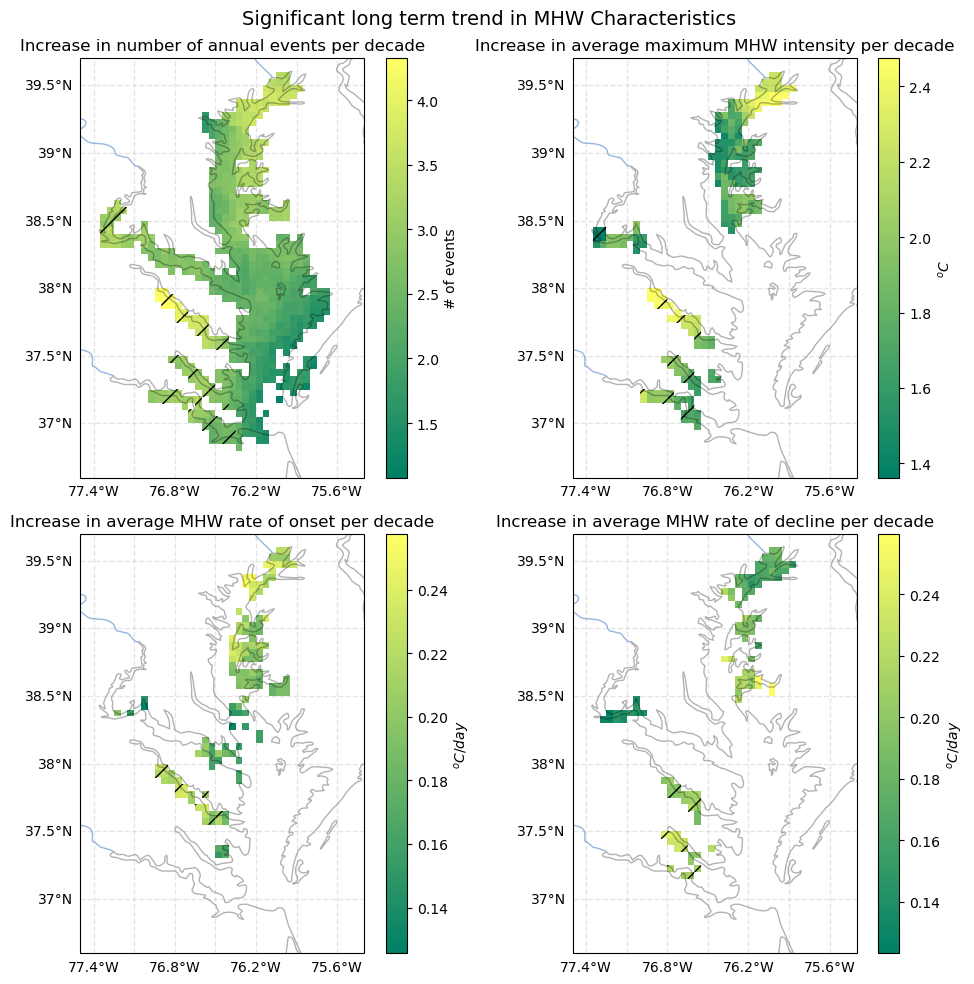

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Significant long term trend in MHW Characteristics', size=14)

for ax in axes.flatten():
    # Add background features
    ax.add_feature(cfeature.COASTLINE, alpha=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.RIVERS)

    ax.set_extent([-77.5, -75.4, 36.6, 39.7])

    # Add and format gridlines. Remove top and right labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.2, linestyle='--')
    gl.top_labels, gl.right_labels = False, False


# Number of annual events
yearly_events_slope_da.plot(ax=axes[0, 0], cmap='summer', 
                            cbar_kwargs={'label': '# of events'})
events_mask = xr.where(mask.notnull() & yearly_events_slope_da.notnull(), 1, np.nan)
# Use pcolor with alpha set to 0 to get just crosshatch
axes[0, 0].pcolor(mask.longitude.data, mask.latitude.data, events_mask.data, hatch='/', 
                  alpha=0., transform=ccrs.PlateCarree())
axes[0, 0].set_title('Increase in number of annual events per decade')
# over the course of a decade that location will eventually start contributing
# x (colorbar number) additional events per year
# AKA 4 on colorbar = on average an additional 0.4 events per year ->
# (for example) between 2003 and 2013, 2013 should have 4 additional mhw as compared to 2003

# Maximum intensity
avg_maxi_slope_da.plot(ax=axes[0, 1], cmap='summer', 
                       cbar_kwargs={'label': '$^oC$'})
maxi_mask = xr.where(mask.notnull() & avg_maxi_slope_da.notnull(), 1, np.nan)
# Use pcolor with alpha set to 0 to get just crosshatch
axes[0, 1].pcolor(mask.longitude.data, mask.latitude.data, maxi_mask.data, hatch='/', 
                  alpha=0., transform=ccrs.PlateCarree())
axes[0, 1].set_title('Increase in average maximum MHW intensity per decade')

# Rate of onset
avg_rate_onset_slope_da.plot(ax=axes[1, 0], cmap='summer',
                             cbar_kwargs={'label': '$^oC/day$'})
onset_mask = xr.where(mask.notnull() & avg_rate_onset_slope_da.notnull(), 1, np.nan)
# Use pcolor with alpha set to 0 to get just crosshatch
axes[1, 0].pcolor(mask.longitude.data, mask.latitude.data, onset_mask.data, hatch='/', 
                  alpha=0., transform=ccrs.PlateCarree())
axes[1, 0].set_title('Increase in average MHW rate of onset per decade')

# Rate of decline
avg_rate_decline_slope_da.plot(ax=axes[1, 1], cmap='summer', 
                               cbar_kwargs={'label': '$^oC/day$'})
decline_mask = xr.where(mask.notnull() & avg_rate_decline_slope_da.notnull(), 1, np.nan)
# Use pcolor with alpha set to 0 to get just crosshatch
axes[1, 1].pcolor(mask.longitude.data, mask.latitude.data, decline_mask.data, hatch='/', 
                  alpha=0., transform=ccrs.PlateCarree())
axes[1, 1].set_title('Increase in average MHW rate of decline per decade')

plt.tight_layout()

if SAVE_FIGS:
    plt.savefig(
        REPO_ROOT / 'figures/03_marineheatwaves' / 'mhw_longterm_trends.jpg', 
        bbox_inches='tight', dpi=500)

## Save data

Change in average cumulative intensity and change in average duration are not saved because there are not significant pixels to save.

In [29]:
yearly_events_slope_da.attrs['units'] = '# of events / year'
mhw_days_slope_da.attrs['units'] = 'days / year'
avg_maxi_slope_da.attrs['units'] = 'Celsius / year'
avg_rate_onset_slope_da.attrs['units'] = 'Celsius / day / year'
avg_rate_decline_slope_da.attrs['units'] = 'Celsius / day / year'

In [30]:
yearly_events_slope_da.rio.write_crs("epsg:4326", inplace=True)
mhw_days_slope_da.rio.write_crs("epsg:4326", inplace=True)
avg_maxi_slope_da.rio.write_crs("epsg:4326", inplace=True)
avg_rate_onset_slope_da.rio.write_crs("epsg:4326", inplace=True)
avg_rate_decline_slope_da.rio.write_crs("epsg:4326", inplace=True)

<xarray.DataArray 'avg_rate_decline_slope' (latitude: 65, longitude: 40)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude     (latitude) float32 36.78 36.83 36.88 ... 39.88 39.92 39.97
  * longitude    (longitude) float32 -77.47 -77.43 -77.38 ... -75.57 -75.53
    spatial_ref  int64 0
Attributes:
    units:    Celsius / day / year

In [31]:
yearly_events_slope_da.attrs['description'] = (
    'Change in the number of MHW events per year over '
    'the study period Jan. 1, 2003 to Dec. 31, 2023. Derived from Geo-Polar'
    'SST.'
)
mhw_days_slope_da.attrs['description'] = (
    'Change in the number of total number of annual MHW days over'
    'the study period Jan. 1, 2003 to Dec. 31, 2023. Derived from Geo-Polar'
    'SST.'
)
avg_maxi_slope_da.attrs['description'] = (
    'Change in the number of average maximum MHW intensity over'
    'the study period Jan. 1, 2003 to Dec. 31, 2023. Derived from Geo-Polar'
    'SST.'
)
avg_rate_onset_slope_da.attrs['description'] = (
    'Change in the number of average MHW rate of onset over'
    'the study period Jan. 1, 2003 to Dec. 31, 2023. Derived from Geo-Polar'
    'SST.'
)
avg_rate_decline_slope_da.attrs['description'] = (
    'Change in the number of average MHW rate of decline over'
    'the study period Jan. 1, 2003 to Dec. 31, 2023. Derived from Geo-Polar'
    'SST.'
)

In [32]:
long_term_mhw_trends = xr.merge([
    yearly_events_slope_da, mhw_days_slope_da, avg_maxi_slope_da, 
    avg_rate_onset_slope_da, avg_rate_decline_slope_da
])

In [33]:
long_term_mhw_trends.to_netcdf(
    REPO_ROOT / 'data/03_processed' / 'mhw_characterisitics_longterm_trends.nc'
)

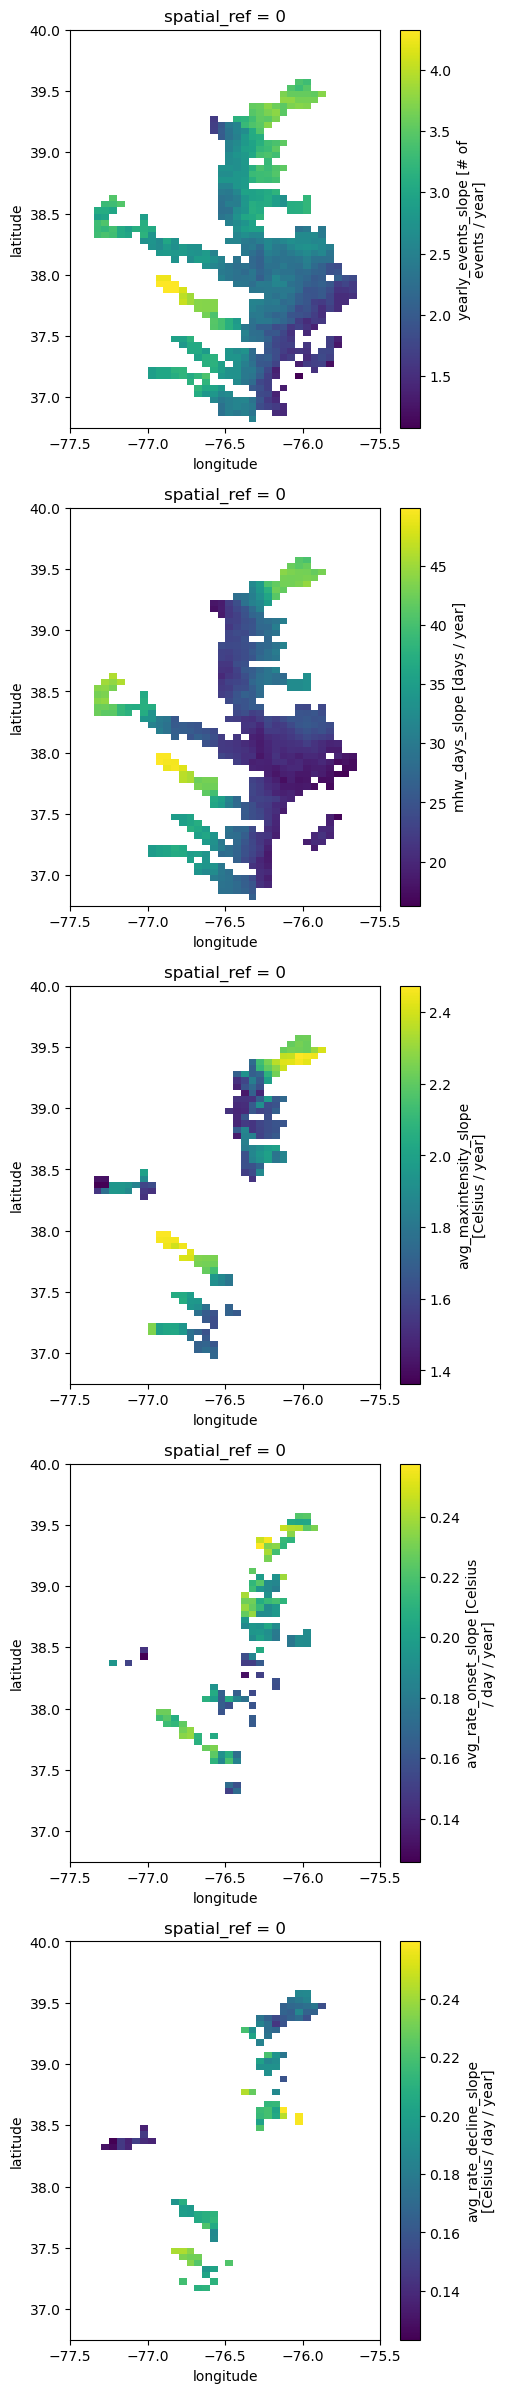

In [34]:
fig, axes = plt.subplots(5, 1, figsize=(5, 30))
for i, da in enumerate([yearly_events_slope_da, mhw_days_slope_da, 
    avg_maxi_slope_da, avg_rate_onset_slope_da, 
    avg_rate_decline_slope_da]):
    da.plot(ax=axes[i])

In [35]:
long_term_trends = xr.merge([
    yearly_events_slope_da, mhw_days_slope_da, avg_maxi_slope_da, 
    avg_rate_onset_slope_da, avg_rate_decline_slope_da
])

In [38]:
long_term_trends.to_netcdf(
    REPO_ROOT / 'data/03_processed' / 'mhw_characteristics_longterm_trends.nc'
)

## Old Plots (delete all below)

In [ ]:
# Where does this fit into the analysis?
mhw_days_slope_da.plot( cmap='summer', cbar_kwargs={'label': '# of days / year'})
plt.title('Change in mhw days / year')
plt.pcolor(avg_mean_intensity['longitude'], avg_mean_intensity['latitude'], 
          mhw_days_trend10, hatch='xxx', alpha=0.,)

### Plot over Time

Averaging (not summing) over all the pixels)

In [ ]:
mhw_days_annual_mean = mhw_days.mean(axis=0).mean(axis=0)

In [ ]:
plt.plot(pd.date_range('2003', '2022', freq='YS'), mhw_days_annual_mean, marker='o')
plt.xlabel('Year')
plt.ylabel('# of MHW days per year')
plt.title('Number of MHW days over Time')

plt.grid(axis='y', linestyle='--')
# plt.ylim([0, 22])

# plt.savefig('figures/mhw_days_timeseries.png')

### Because that duration thing really bothers me

A cute little thing I just did but I don't think it took my anywhere

In [ ]:
# 0, 39 is the bottom right corner
avg_duration.isel(latitude=0, longitude=39).values
# event_statistics[0, 39]

In [ ]:
# UPPER BAY POINT
avg_duration.isel(latitude=47, longitude=23).values

In [ ]:
# LOWER BAY POINT
avg_duration.isel(latitude=15, longitude=27).values

In [ ]:
event_statistics.shape

In [ ]:
upper_starts = event_statistics[45, 25]['date_start']
upper_ends = event_statistics[45, 25]['date_end']
lower_starts = event_statistics[15, 25]['date_start']
lower_ends = event_statistics[15, 25]['date_end']

In [ ]:
plt.figure(figsize=(30,5))

# upper will be at y = 1, lower will be at y = 2
x1, y1 = [upper_starts[0], upper_ends[0]], [1]*2
x2, y2 = [lower_starts[0], lower_ends[0]], [1.2]*2
plt.plot(x1, y1, x2, y2, marker='o')

In [ ]:
plt.figure(figsize=(60,1))

# upper will be at y = 1.2, lower will be at y = 1
for i in range(len(upper_starts)):
    x1, y1 = [upper_starts[i], upper_ends[i]], [1.2]*2
    plt.plot(x1, y1, marker='o')

for i in range(len(lower_starts)):
    x1, y1 = [lower_starts[i], lower_ends[i]], [1]*2
    plt.plot(x1, y1, marker='o')

plt.savefig('./scratch.png')

In [ ]:
all_days = pd.date_range('2002-01-01', '2022-12-31')
events_upper = pd.DataFrame({'MHW': len(upper_starts)*[1]}, index=pd.to_datetime(upper_starts)).reindex(all_days)
events_lower = pd.DataFrame({'MHW': len(upper_starts)*[1]}, index=pd.to_datetime(upper_starts)).reindex(all_days)

In [ ]:
events_upper

# Looking at start date

In [ ]:
len(event_statistics[25, 25]['date_start'])

In [ ]:
def monthly_start_dates(time_arr):
    starts = pd.DataFrame({'date_start': pd.to_datetime(time_arr['date_start'])})
    monthly = starts.groupby(starts['date_start'].dt.month).count()['date_start']
    # Reindex to a full 12 months, in case there are missing months 
    # (land values have all missing months)
    monthly = monthly.reindex(range(1, 13))
    return monthly.values

In [ ]:
monthly_start_dates(event_statistics[0,0]).shape

In [ ]:
# total # of pixels
print('max ', event_statistics.size)

In [ ]:
# The number of mhw that started in that month, time series plotted for all the pixels
plt.figure()
for i in range(monthly_starts.shape[0]):
    for j in range(monthly_starts.shape[1]):
        plt.plot(range(1, 13), monthly_starts[i, j])
plt.show()

In [ ]:
# The number of mhw that started in that month, time series plotted for all the pixels
plt.figure()
for i in range(monthly_starts.shape[0]):
    for j in range(monthly_starts.shape[1]):
        plt.scatter(range(1, 13), monthly_starts[i, j], color='blue', alpha=0.02)
plt.show()

In [ ]:
time_arr = event_statistics[25, 25]

In [ ]:
time_df = pd.DataFrame({'date_start': pd.to_datetime(time_arr['date_start'])})

In [ ]:
months = time_df.groupby([pd.cut(time_df['date_start'].dt.year, [2002, 2007, 2012, 2017, 2022]), time_df['date_start'].dt.month]).count()


In [ ]:
hacking = months.swaplevel(0, 1).sort_index(1)

In [ ]:
fig, ax = plt.subplots()

hacking.iloc[:12].plot(color='yellow', ax=ax)
hacking.iloc[12:24].plot(color='orange', ax=ax)
hacking.iloc[24:36].plot(color='red', ax=ax)
hacking.iloc[36:48].plot(color='red', ax=ax)

### Trends (Linear Regression) [SKIP]

In [ ]:
def linear_regression_wrapper(arr, max_pval):
    """ Calculate the linear regression along 20 years and return just the slope
    of the line, if the p_value is above a threshold value
    """
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(range(20), arr)
    # filter out points that aren't significant
    if p_value > max_pval:
        slope = np.nan

    return slope

In [ ]:
yearly_events_slope = np.apply_along_axis(linear_regression_wrapper, 2, yearly_events, 0.05)
mhw_days_slope = np.apply_along_axis(linear_regression_wrapper, 2, mhw_days, 0.05)
avg_duration_slope = np.apply_along_axis(linear_regression_wrapper, 2, avg_duration, 0.05)
avg_maxi_slope = np.apply_along_axis(linear_regression_wrapper, 2, avg_max_intensity, 0.05)
avg_cumi_slope = np.apply_along_axis(linear_regression_wrapper, 2, avg_cum_intensity, 0.05)
avg_rate_onset_slope = np.apply_along_axis(linear_regression_wrapper, 2, avg_rate_onset, 0.05)
avg_rate_decline_slope = np.apply_along_axis(linear_regression_wrapper, 2, avg_rate_decline, 0.05)

In [ ]:
# opening an existing file for coordinates
path = os.path.join(REPO_ROOT, 'data/processed/mhw_stats_outputs', 
                    'average_mean_intensity_CBay_geopolar.nc')
avg_mean_intensity = xr.open_dataset(path).avg_mean_intensity

In [ ]:
yearly_events_slope_da = xr.DataArray(yearly_events_slope,coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
mhw_days_slope_da = xr.DataArray(mhw_days_slope,coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
avg_duration_slope_da = xr.DataArray(avg_duration_slope,coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
avg_maxi_slope_da = xr.DataArray(avg_maxi_slope,coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
avg_cumi_slope_da = xr.DataArray(avg_cumi_slope,coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
avg_rate_onset_slope_da = xr.DataArray(avg_rate_onset_slope,coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
avg_rate_decline_slope_da = xr.DataArray(avg_rate_decline_slope, coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])